### How are skills trending for Data jobs across the year?

## Methodology

1.Aggregate skill counts monthly
2.Calculate the percentage of likelihood of a skill being mentioned in data job for a particlaur month
3.Plot the monthly skills demand


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

df = pd.read_csv('C:\\Users\\aksha\\data_analysis_job_market\\dataset\\data_jobs.csv')

## Data cleaning

# convert time into datetime object

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])



In [9]:
# convert the months also into month names

df['job_posted_month'] =df['job_posted_date'].dt.month
df['job_month_name'] = df['job_posted_date'].dt.month_name()

In [10]:
df.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_month_name
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN,6,June
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1,January
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10,October
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,July
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",8,August
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",11,November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,NaN,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",3,March
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,NaN,NaN,NaN,Zitec,"['sql', 'nosql', 'gcp', 'azure', 'aws', 'bigqu...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...",12,December
8,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,NaN,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",6,June
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",4,April


In [11]:
### Let's only focus on jobs in the united states

df_US = df[df['job_country']=='United States'].copy()


In [13]:
# let's see what are the most in demand jobs in the United states

df_US_indemand = df_US['job_title_short'].value_counts()
df_US_indemand

job_title_short
Data Analyst                 67816
Data Scientist               58830
Data Engineer                35080
Senior Data Scientist        12946
Senior Data Analyst          11791
Senior Data Engineer          9289
Business Analyst              7382
Software Engineer             1814
Machine Learning Engineer      921
Cloud Engineer                 423
Name: count, dtype: int64

In [19]:
top_3_jobs_in_US = df_US_indemand.head(3).index.to_list()
print(top_3_jobs_in_US)
df_US_data = df_US[df_US['job_title_short'].isin(top_3_jobs_in_US)]
df_US_data.head(10)

['Data Analyst', 'Data Scientist', 'Data Engineer']


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_month_name
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",11,November
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",4,April
11,Data Engineer,Data Engineer,"Colorado Springs, CO (+3 others)",via The Muse,Full-time,False,"Texas, United States",2023-11-03 13:06:51,False,True,United States,NaN,NaN,NaN,Philips,"['python', 'qlik']","{'analyst_tools': ['qlik'], 'programming': ['p...",11,November
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,NaN,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"['go', 'apl', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",6,June
26,Data Engineer,Data Engineer,United States,via LinkedIn,Full-time,False,Georgia,2023-09-15 13:56:18,True,False,United States,NaN,NaN,NaN,Infinite Computer Solutions,NaN,NaN,9,September
27,Data Engineer,"Principal Data Engineer (Lead), Knowledge Grap...","San Francisco, CA",via LinkedIn,Full-time,False,Georgia,2023-02-18 13:31:24,False,False,United States,NaN,NaN,NaN,Altos Labs,"['python', 'r', 'java']","{'programming': ['python', 'r', 'java']}",2,February
32,Data Scientist,Sr. Data Scientist (NLP) - Full-time / Part-time,"Dallas, TX",via Snagajob,Full-time,False,"Texas, United States",2023-03-13 13:07:03,False,True,United States,NaN,NaN,NaN,MCKESSON,"['python', 'azure', 'databricks', 'pyspark', '...","{'cloud': ['azure', 'databricks'], 'libraries'...",3,March
35,Data Engineer,Data Engineer - Royal Canin,"St Charles, MO",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-17 13:10:21,True,True,United States,NaN,NaN,NaN,Mars,"['python', 'sql', 'neo4j', 'databricks', 'azur...","{'cloud': ['databricks', 'azure'], 'databases'...",2,February
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,NaN,NaN,NaN,Assuredpartners,NaN,NaN,11,November


In [20]:
## Let's find the skills for each of these jobs in demand

df_US_data['job_skills']=df_US_data['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)


C:\Users\aksha\AppData\Local\Temp\ipykernel_39920\609460891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_data['job_skills']=df_US_data['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)


In [22]:
df_US_data = df_US_data.explode('job_skills') 
df_US_data.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_month_name
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,python,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,July
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,c++,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,July
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,java,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,July
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,matlab,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,July
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,aws,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,July


In [33]:
df_summary = df_US_data[df_US_data['job_title_short']=='Data Analyst'].pivot_table(index='job_posted_month',columns='job_skills',aggfunc='size',fill_value=0)


In [34]:
df_summary

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


In [35]:
df_summary.loc['total']=df_summary.sum()
df_summary

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


In [36]:
df_summary =df_summary[df_summary.loc['total'].sort_values(ascending=False).index]
df_summary =df_summary.drop('total')

In [37]:
df_plot = df_summary.iloc[:,:5]
df_plot

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
1,4601,3592,2488,2254,1832
2,3168,2587,1676,1618,1212
3,3226,2661,1804,1683,1238
4,3220,2549,1789,1679,1302
5,2581,2118,1432,1349,972
6,2862,2382,1628,1609,984
7,2609,2118,1533,1438,996
8,3414,2731,1951,2025,1276
9,2295,1801,1353,1229,856


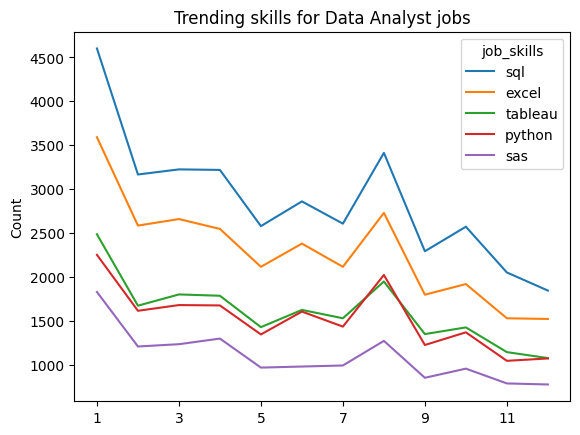

In [38]:
df_plot.plot(kind='line')
plt.title('Trending skills for Data Analyst jobs')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [66]:
total_jobs_posted_per_month = df_US[df_US['job_title_short']=='Data Analyst'].groupby('job_posted_month').size()
total_jobs_posted_per_month

job_posted_month
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

<Axes: xlabel='job_posted_month'>

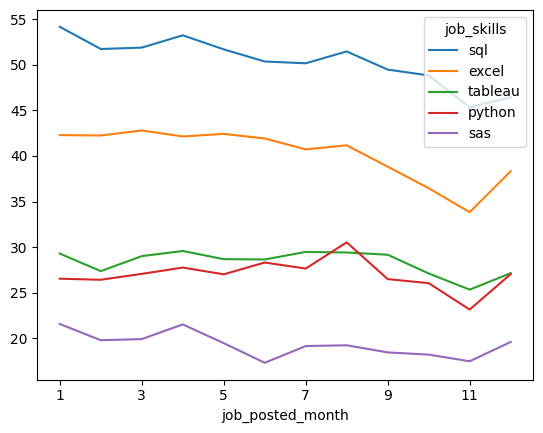

In [73]:
df_percent = df_plot.apply(lambda x: 100*(x/total_jobs_posted_per_month))
df_percent.plot(kind='line')


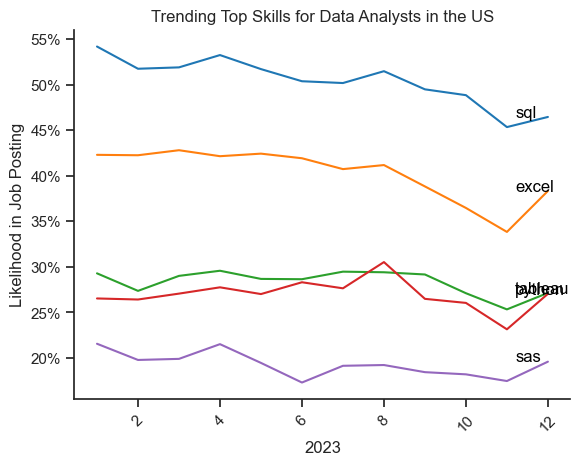

In [ ]:
#Let's add the percent symbol and the months in words

from matplotlib.ticker import PercentFormatter

df_plot = df_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')
  


plt.show()